In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('bitcoinfinal.csv', header=None)
data.columns = ['Month','Price']
# data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')
data = data.set_index('Month')
data.head(12)

,Price
Month,
0,217.4
1,255.7
2,244.3
3,236.1
4,228.7
5,262.9
6,284.5
7,231.4
8,236.5


In [3]:
train_len = 29
train= data[:train_len]
test = data[train_len:]
print(len(train.index))
train.tail(5)

29


,Price
Month,
24,966.2
25,1189.1
26,1081.7
27,1435.2
28,2191.8


## naive method

In [4]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Price'][train_len-1] # last observation in train data is our prediction
y_hat_naive.head()

,Price,naive_forecast
Month,,
29,2420.7,2191.8
30,2856.0,2191.8
31,4268.8,2191.8


In [5]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Price'] - y_hat_naive['naive_forecast'])/test['Price'])*100, 2)
rmse, mape

(1265.9, 27.12)

## Simple average forecasting

In [6]:
y_hat_average = test.copy()
y_hat_average['avg_forecast'] = train['Price'].mean()
y_hat_average

,Price,avg_forecast
Month,,
29,2420.7,595.751724
30,2856.0,595.751724
31,4268.8,595.751724


In [7]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_average['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Price'] - y_hat_average['avg_forecast'])/test['Price'])*100, 2)
rmse, mape

(2703.73, 80.19)

## Simple moving average 

In [8]:
y_hat_sma = data.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = data['Price'].rolling(ma_window).mean()
y_hat_sma.iloc[train_len:]

,Price,sma_forecast
Month,,
29,2420.7,1125.450000
30,2856.0,1311.475000
31,4268.8,1619.191667


In [9]:
# adjustment for test period
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len] # fill with last value
y_hat_sma.iloc[train_len:]

,Price,sma_forecast
Month,,
29,2420.7,1125.45
30,2856.0,1125.45
31,4268.8,1125.45


In [10]:
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Price'] - y_hat_sma['sma_forecast'][train_len:])/test['Price'])*100, 2)
rmse, mape

(2202.51, 62.58)

#### window = 6

In [11]:
y_hat_sma = data.copy()
ma_window = 6
y_hat_sma['sma_forecast'] = data['Price'].rolling(ma_window).mean()
y_hat_sma.iloc[train_len:]

,Price,sma_forecast
Month,,
29,2420.7,1547.450000
30,2856.0,1862.416667
31,4268.8,2375.700000


In [12]:
# adjustment for test period
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len] # fill with last value
y_hat_sma.iloc[train_len:]

,Price,sma_forecast
Month,,
29,2420.7,1547.45
30,2856.0,1547.45
31,4268.8,1547.45


In [13]:
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Price'] - y_hat_sma['sma_forecast'][train_len:])/test['Price'])*100, 2)
rmse, mape

(1814.81, 48.55)

#### window = 3

In [14]:
y_hat_sma = data.copy()
ma_window = 3
y_hat_sma['sma_forecast'] = data['Price'].rolling(ma_window).mean()
y_hat_sma.iloc[train_len:]

,Price,sma_forecast
Month,,
29,2420.7,2015.900000
30,2856.0,2489.500000
31,4268.8,3181.833333


In [15]:
# adjustment for test period
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len] # fill with last value
y_hat_sma.iloc[train_len:]

,Price,sma_forecast
Month,,
29,2420.7,2015.9
30,2856.0,2015.9
31,4268.8,2015.9


In [16]:
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Price'] - y_hat_sma['sma_forecast'][train_len:])/test['Price'])*100, 2)
rmse, mape

(1407.74, 32.97)

## Simple exponential smoothing

In [17]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(train['Price'])
model_fit =  model.fit(optimized =True) # smoothing level is the alpha
print(model_fit.b)
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] =  model_fit.forecast(3)

{'smoothing_level': 1.0, 'smoothing_slope': nan, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 217.403610619585, 'initial_slope': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


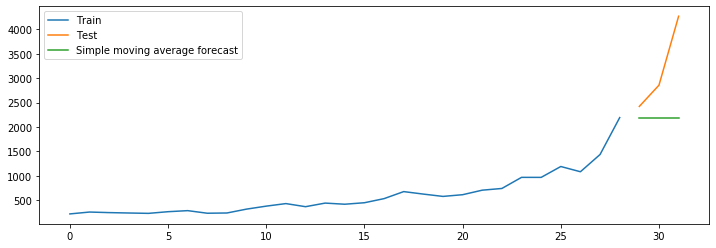

In [18]:
### plot train test and forecast
plt.figure(figsize=(12, 4))
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label = 'Simple moving average forecast')
plt.legend(loc='best')

In [19]:
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Price'] - y_hat_ses['ses_forecast'])/test['Price'])*100, 2)
rmse, mape

(1265.9, 27.12)

### Holt's exponential smoothing method with Trend

In [20]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.array(train['Price']), seasonal_periods = 12, trend = 'additive', seasonal=None)
model_fit = model.fit(optimized = True)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(3)

{'smoothing_level': 1.0, 'smoothing_slope': 0.42166543817420776, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 203.68784435912738, 'initial_slope': 13.714211507493342, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train test and forecast

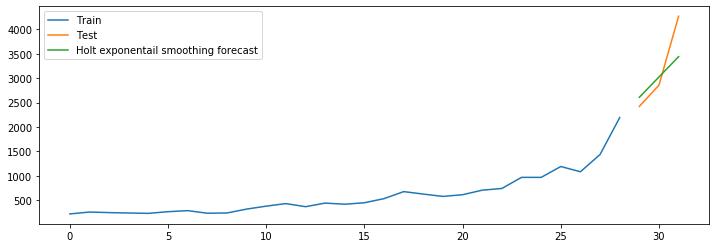

In [21]:
### plot train test and forecast
plt.figure(figsize=(12, 4))
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label = 'Holt exponentail smoothing forecast')
plt.legend(loc='best')

In [22]:
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Price'] - y_hat_holt['holt_forecast'])/test['Price'])*100, 2)
rmse, mape

(500.11, 11.01)

### Holt winter's additive method with trend and seasonality

In [23]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Price']), seasonal_periods = 12 , trend = 'add', seasonal ='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hwa_forecast'] = model_fit.forecast(3)

{'smoothing_level': 0.9999, 'smoothing_slope': 0.9999, 'smoothing_seasonal': 0.0001, 'damping_slope': nan, 'initial_level': 516.3666666666667, 'initial_slope': 26.20833333333334, 'initial_seasons': array([-298.96666667, -260.66666667, -272.06666667, -280.26666667,
       -287.66666667, -253.46666667, -231.86666667, -284.96666667,
       -279.86666667, -200.36666667, -139.46666667,  -87.36666667]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


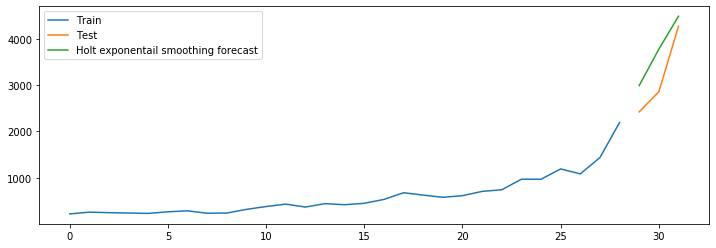

In [24]:
### plot train test and forecast
plt.figure(figsize=(12, 4))
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat_hwa['hwa_forecast'], label = 'Holt exponentail smoothing forecast')
plt.legend(loc='best')

In [25]:
# calcualte rmse, mape as above

rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_hwa['hwa_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Price'] - y_hat_hwa['hwa_forecast'])/test['Price'])*100, 2)

In [26]:
rmse, mape

(636.86, 20.27)

## Holt winters multiplicative method with trend and seasonality

In [27]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Price']), seasonal_periods = 12 , trend = 'add', seasonal ='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hwa_forecast'] = model_fit.forecast(3)

{'smoothing_level': 1.0, 'smoothing_slope': 0.8203632858208174, 'smoothing_seasonal': 0.0, 'damping_slope': nan, 'initial_level': 516.3662918828409, 'initial_slope': 26.208239816122965, 'initial_seasons': array([0.43532113, 0.48187911, 0.40439223, 0.47331682, 0.63578604,
       0.80773651, 0.70790656, 0.55164644, 0.48019517, 0.47495628,
       0.44181569, 0.4964509 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


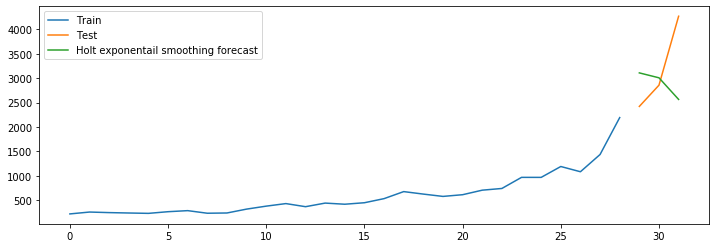

In [28]:
### plot train test and forecast
plt.figure(figsize=(12, 4))
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat_hwa['hwa_forecast'], label = 'Holt exponentail smoothing forecast')
plt.legend(loc='best')

In [29]:
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_hwa['hwa_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Price'] - y_hat_hwa['hwa_forecast'])/test['Price'])*100, 2)

In [30]:
rmse, mape

(1064.76, 24.54)